**YOUR NAME**

Spring 2022

CS 251: Data Analysis and Visualization

# Lab 3a: Linear Regression

## Task 1. Mystery Data 1

### 1a) Import the data

1. Import data 'data/mystery_data_1.csv' (using your data class or [genfromtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html))
2. Print first 10 lines rows of data.

#### 1b) Using the following links and MatPlotLib documentation to view the data:
- [MatPlotLib](https://matplotlib.org/)
- [MatPlotLib hist](https://matplotlib.org/gallery/statistics/hist.html)
1. Create a figure with 3 subplots
    1. One scatterplot with column X on the x-axis and column Y on the y-axis.
    1. Two historgrams one for the X data and the other for the Y data.
    2. Create the histograms with 10 bins.
    3. Include a title for each subplot.

In [54]:
import numpy as np
import matplotlib.pyplot as plt


plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams["figure.figsize"] = [12,4.5]
data=np.genfromtxt ('data/mystery_data_1.csv', delimiter=",", skip_header=2)   
print("First 10 rows:\n",data[:10])

print('''
-----------------------------------
Your results should look like this:
-----------------------------------
First 10 rows:
[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
-----------------------------------
''')

First 10 rows:
 [[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]

-----------------------------------
Your results should look like this:
-----------------------------------
First 10 rows:
[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
-----------------------------------



/tmp/ipykernel_2556/1186965079.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
/tmp/ipykernel_2556/1186965079.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])


/tmp/ipykernel_2556/74596650.py:2: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout(pad=40)


Text(0.5, 1.0, 'Histogrom of y data')

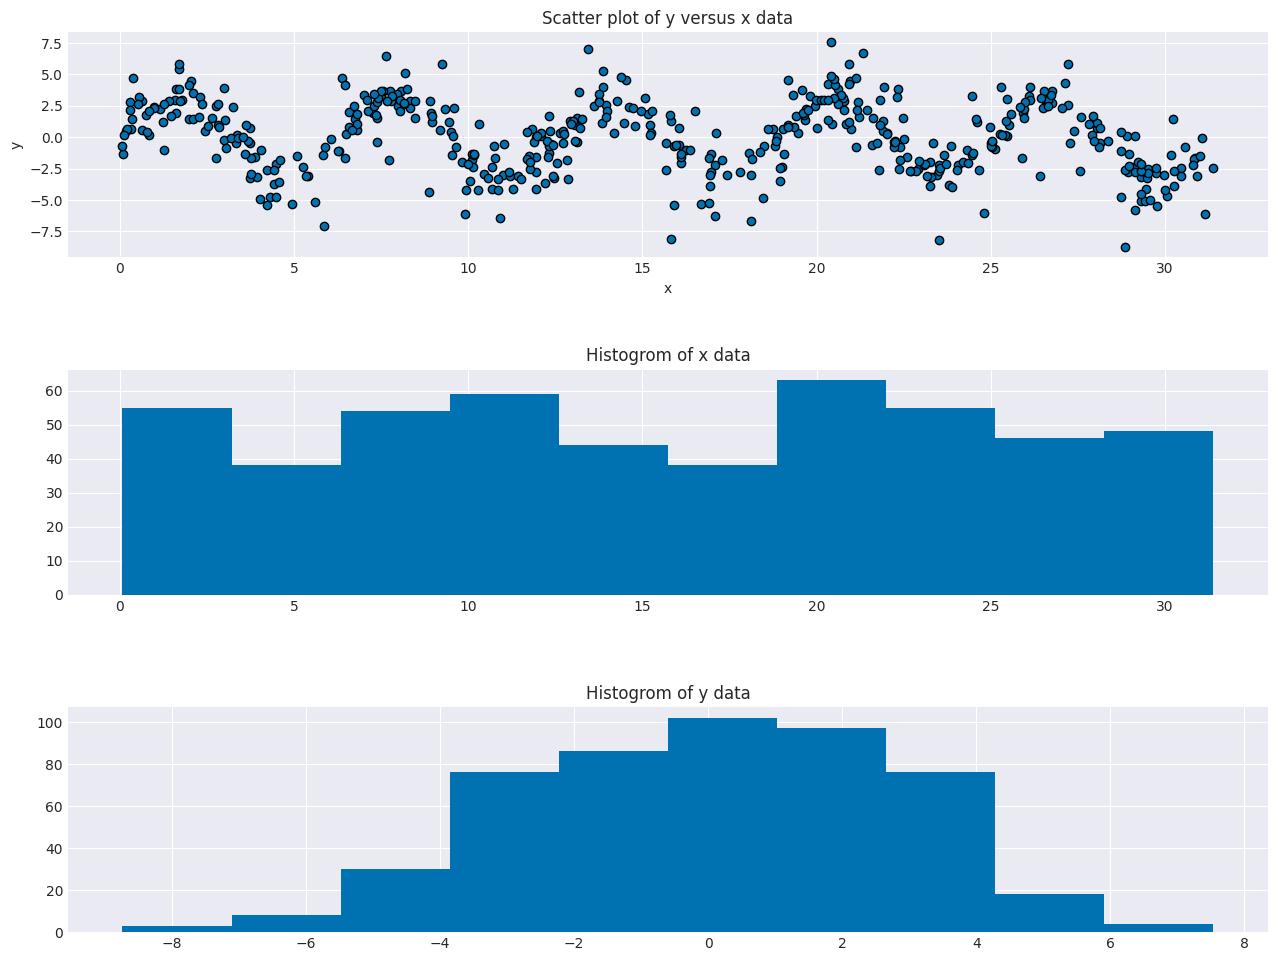

In [55]:
fig, axes = plt.subplots(3,1)
fig.tight_layout(pad=40)

plt.subplots_adjust(left=3,
                    bottom=3,
                    right=4,
                    top=5,
                    wspace=.5,
                    hspace=.5)

# axs[0, 0].scatter(x, y)
x=data[:,0]
y=data[:,1]
axes[0].set_title("Scatter plot of y versus x data")

axes[0].scatter(x,y,  edgecolors='black')
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")

axes[1].hist(x, bins=10)
axes[1].set_title("Histogrom of x data")

axes[2].hist(y, bins=10)
axes[2].set_title("Histogrom of y data")






test is predicitng y values from the leftover 20% x and the c (from train) and then comparing that to the actual y values

## Task 2. Analyze Mystery Data 1

### 2a) Use scipy to calculate the linear regression for Mystery Data 1 

1. Print first 10 lines rows of data.
2. Calculate the linear regression [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)
    1. The x column is the left hand side array and the y column is the right hand side array.
    2. This includes adding homogeneous coordinates (for the intercept) to the A matrix. 
    3. Useful methods: [hstack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html), [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) and [reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)
3. Print the least-squares solution and residues
4. Using the residual, calculate and print the $R^2$ value
    1. $R^2 = 1 - \frac{residues}{smd}$
    2. The square mean deviation: $smd = \sum (y - \frac{\sum y}{n} )^2$

In [56]:
import scipy.linalg as sp_la
# These are our independent variable(s)
# x = data[np.ix_(np.arange(data.shape[0]), [0])]

# We add a column of 1s for the intercept
x=data[:,0] #one dimensional array 

# x.reshape(x.size,1) makes one dimesionsal array 2 dimesnionsal so you can put it with it 2d array of ones, make it so that you can combine 2d with 2d

xwithones = np.hstack((np.array([np.ones(x.shape[0])]).T, x.reshape(x.size,1)))

# This is the dependent variable 
y = data[:, 1]
# This is the regression coefficients that were fit, plus some other results
c, residues, _, _ = sp_la.lstsq(xwithones, y)
print("c: ",c)
print("residues: ",residues)
meanofy=np.mean(data[:,1])
squaremedandeviation=np.sum((y-meanofy)**2)
r2=1-(residues/squaremedandeviation)
print("r2: ", r2)




c:  [ 0.92884793 -0.05650709]
residues:  3722.8001542015754
r2:  0.033824411486558126


In [57]:
import scipy.linalg

print('''
-----------------------------------
Your results should look like this:
----------------------------------- 
c: [ 0.92884793 -0.05650709]

residues: 3722.8001542015754

r2: 0.033824411486558126
-----------------------------------
''')


-----------------------------------
Your results should look like this:
----------------------------------- 
c: [ 0.92884793 -0.05650709]

residues: 3722.8001542015754

r2: 0.033824411486558126
-----------------------------------



### 2b) Visualize linear regression results with matplotlib

1. Plot a scatterplot of the mystery data X on the x axis and Y on the y axis
2. Plot a line representing the linear regression
    1. For line_x, use [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to create 100 points from the min x value to the max x value
    2. For line_y, multiply line_x by the slope and add the intercept
3. Include a title (with $R^2$ value), legend, x label and y label

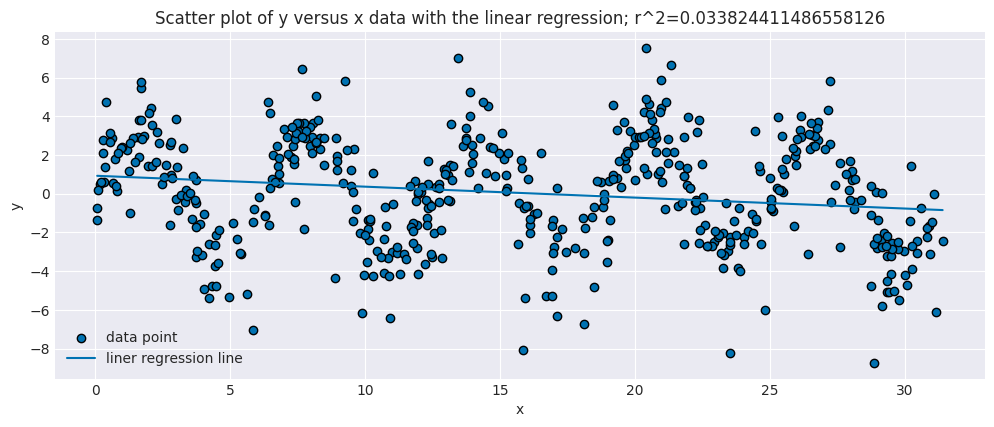

In [65]:
fig, axes = plt.subplots()


# axs[0, 0].scatter(x, y)
x=data[:,0]
y=data[:,1]
axes.set_title("Scatter plot of y versus x data with the linear regression; r^2=0.033824411486558126")

axes.scatter(x,y,  edgecolors='black')
axes.set_xlabel("x")
axes.set_ylabel("y")

xrandom=np.linspace(x.min(), x.max(), 100)
line_y=xrandom*c[1]+c[0]
plt.plot(xrandom,line_y)
plt.legend(["data point","liner regression line"]);

### 2c)  Interpret the results of the linear regression of the dataset 

Interpret the results based on your plot and $R^2$ value. Is the linear regression model a good model for the data? Why?

Not nessarily because the model is like a sine function that ossicalines, not a strianght line. Hence, even our r^2 value is low. 